Created by: Aslamic Adika $\\$
date      : 2022-08-30 19.15

# Principal Analysis Component


## Sumber daya dan Ide
ide dari PCA ini adalah melihat kontribusi variabel (kolom di dataset) sebanyak $p$ ($p$ dimensi),$\\$
lalu mereduksinya menjadi $k$ dimensi yang lebih kecil (misal menjadi $2\hspace{1mm}\text{dimensi}$) $\\$
sehingga terdapat $k$ variabel baru ($k\hspace{1mm}\text{dimensi}$) dimana $k$ variabel ini adalah dimensi paling minimum $\\$
 yang memberikan kontribusi variansi data terbesar.

untuk lebih detilnya liat lecture: $\\$

https://www.youtube.com/watch?v=FgakZw6K1QQ&t=301s $\\$ 
https://www.youtube.com/watch?v=n7npKX5zIWI $\\$
https://www.youtube.com/watch?v=L-pQtGm3VS8 $\\$

I made a note for my self-study (the file named "PCA"):

https://drive.google.com/drive/folders/1ITGVQLuWu1jcxgc9zMPF1vw2ITVDktZA


In [109]:
#libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
#Persiapkan dataframe

x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]

In [111]:
a = np.array([x,y])


In [112]:
df = pd.DataFrame(a.T, columns=['x','y'])
df

,x,y
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


## Metode Numerik

Data Adjust

StandardScaller, data ke-$z$: $z_i = \frac{x_i - \bar{x}}{s}$ $\\$ $\\$
di mana rata-rata: $\bar{x} = \frac{1}{n}\sum_1^n x_i$ dan standar deviasi: $s = \sqrt{\frac{1}{n-1}\sum_1^n \left(x_i - \bar{x} \right)^2}$

In [113]:
from sklearn.preprocessing import StandardScaler
standar = StandardScaler()

Untuk keperluan mencoba berhitung, tidak digunakan standardscaler. Tapi, dalam project berikutnya akan digunakan standardscaler.

In [114]:
data_stadard = pd.DataFrame(standar.fit_transform(df[['x','y']]), columns= df.columns)
data_stadard 

,x,y
0,0.926279,0.610169
1,-1.758587,-1.506743
2,0.523549,1.232790
3,0.120819,0.361120
4,1.731739,1.357314
5,0.657792,0.983741
6,0.255062,-0.386025
7,-1.087371,-1.008646
8,-0.416154,-0.386025
9,-0.953127,-1.257695


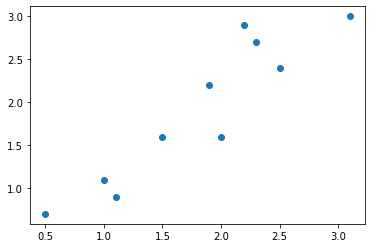

In [115]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

### Covariance matrix
$\begin{equation}  C = \begin{bmatrix}      C(x,x) & C(x,y) \\ C(y,x) & C(y,y)              \end{bmatrix}\end{equation}$ $\\$
di mana $C(x,y) =  \frac{1}{n-1}\sum_1^n \left(x_i - \bar{x} \right)\left(y_i - \bar{y} \right)  $

In [116]:
z = np.mean(x)
w = np.mean(y)

In [117]:
df['x_adj'] = df['x'].map(lambda x: x-z)
df['y_adj'] = df['y'].map(lambda d: d-z)
df

,x,y,x_adj,y_adj
0,2.5,2.4,0.69,0.59
1,0.5,0.7,-1.31,-1.11
2,2.2,2.9,0.39,1.09
3,1.9,2.2,0.09,0.39
4,3.1,3.0,1.29,1.19
5,2.3,2.7,0.49,0.89
6,2.0,1.6,0.19,-0.21
7,1.0,1.1,-0.81,-0.71
8,1.5,1.6,-0.31,-0.21
9,1.1,0.9,-0.71,-0.91


(-2.0, 2.0)

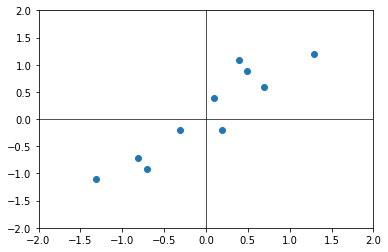

In [118]:
plt.scatter(df.iloc[:,2],df.iloc[:,3],)
plt.xlim(-2,2)
# sns.regplot(df.iloc[:,2],df.iloc[:,3])
plt.axhline(linewidth = 0.68, color = 'black')
plt.axvline(linewidth = 0.68, color = 'black')
plt.ylim(-2,2)

In [119]:
Cov_xy_baru = np.cov(df.iloc[:,2],df.iloc[:,3])
Cov_xy_baru

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [120]:
from numpy import linalg as la

In [121]:
eigen_val, eigen_vec = la.eig(Cov_xy_baru)
eigen_val

array([0.0490834 , 1.28402771])

In [122]:
eigen_vec

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

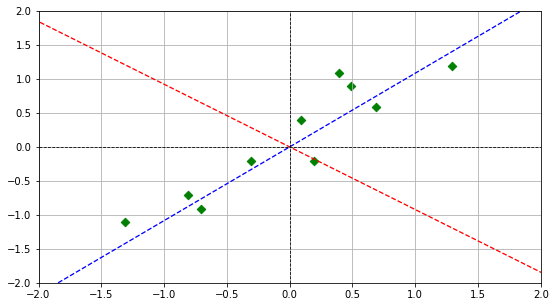

In [123]:

c = np.linspace(-2,2,1000)
plt.figure(figsize=(9,5))
plt.plot(-0.73517866*c/0.6778734,c, ls = '--',color = 'red', linewidth =1.3)
plt.plot(0.6778734*c/0.73517866,c, ls = '--',color = 'blue', linewidth =1.3) #Principal component 1
plt.scatter(df.iloc[:,2],df.iloc[:,3], marker='D',color='green')
plt.grid(True)
plt.axvline(x=0, c="black", label="x=0", ls = '--', linewidth = 0.8)
plt.axhline(y=0, c="black", label="y=0", ls = '--',linewidth = 0.8)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()


Dar gambar di atas, principal component pertama adalah garis biru (eigen value dengan nilai tertinggi). Sehingga sekarang dengan satu garis (1 dimensi) $\\$
kita dapatkan dimensi yang lebih kecil

#### feature vector

$feature\hspace{1mm}vector = \left\lbrace \lambda_1,\lambda_2,\lambda_3,\dots, \lambda_p \right\rbrace $ $\\$
where $\lambda_1 \geq \lambda_2 \geq\lambda_3 \geq\dots \geq\lambda_p$

In [124]:
eigen_val

array([0.0490834 , 1.28402771])

In [125]:
eigen_vec

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

In [185]:
0.6778734/0.73517866

0.9220526069132637

In [126]:
#eigen vektor dengan lambda terbesar
eigen_vec[:,1]

array([-0.6778734 , -0.73517866])

mengingat eigen value terbesar adalah $\lambda_1 =  1.28402771$, dengan kontribusi data sebesar: $\\$
$1.28402771/( 1.28402771 + 0.0490834) \approx 96.31\% $, $\lambda_1$ juga membuat eigen vector $u_1 =  \begin{bmatrix}-0.6778734   \\-0.73517866\end{bmatrix}$ $\\$ sehingga Principal Component pertama adalah $u_1$

### Deriving new dataset

$Final\hspace{1mm} = u_1^T df[X_{baru}]^T$

#### First principal component

Untuk mendapatkan data pertama hasil eigen vektor dengan $lambda$ terbesar, maka kita gunakan $u_1$. $\\$
Mengingat FCP diberkan oleh $z_i = a^Tx_i$, maka data first principal component pertama kita adalah $\\$
$z_1 = \begin{bmatrix}-0.6778734   & -0.73517866\end{bmatrix} \begin{bmatrix}0.69   \\0.59\end{bmatrix} = -0.9014880517555286$

In [182]:
np.matmul(eigen_vec[:,1], np.array([df.iloc[0,2],df.iloc[0,3]]).T)

-0.9014880517555286

In [183]:
np.array([df.iloc[0,2],df.iloc[0,3]])

array([0.69, 0.59])

In [128]:
#loop for FCP
FCP = []
def fcp(data):
    for i in range(0,len(data)):
        l = np.matmul(eigen_vec[:,1].T, np.array([data.iloc[i,2],data.iloc[i,3]]))
        k = l.item() #convert array to scalar value
        FCP.append(k)
    print('FCP = ', FCP)
    

In [129]:
fcp(df)

FCP =  [-0.9014880517555286, 1.7040624597259884, -1.0657153599693292, -0.34772828152984014, -1.7493192841989806, -0.9864669687132487, 0.025591571944003466, 1.0710542982442193, 0.3645282712080093, 1.1503026895002995]


In [130]:
df['FCP'] = FCP

In [131]:
df

,x,y,x_adj,y_adj,FCP
0,2.5,2.4,0.69,0.59,-0.901488
1,0.5,0.7,-1.31,-1.11,1.704062
2,2.2,2.9,0.39,1.09,-1.065715
3,1.9,2.2,0.09,0.39,-0.347728
4,3.1,3.0,1.29,1.19,-1.749319
5,2.3,2.7,0.49,0.89,-0.986467
6,2.0,1.6,0.19,-0.21,0.025592
7,1.0,1.1,-0.81,-0.71,1.071054
8,1.5,1.6,-0.31,-0.21,0.364528
9,1.1,0.9,-0.71,-0.91,1.150303


Dari sini kita dapatkan FCP yang digunakan untuk keperluan statistik pada umumnya. Setelah analisis dilakukan, kita perlu mengembalikan data yang ditransformasi ke FCP menjadi data awal. Selanjutnya akan dibahas bagaimana mentransformasi ulang data tersebut.

### menemukan data baru 

mengingat $a^Ta =1$, maka kita tahu bahwa $a^T = a^{-1}$. Mengingat FCP diperoleh dari $z_i = a^Tx_i \\$
maka kita peroleh $x_i = az_i$, dimana $x_i$ merupakan data baru dari First Principal Component.

In [132]:
def data_baru(x):
    x = eigen_vec[:,1][0]*x
    return x
def data_baru1(y):
    y =  eigen_vec[:,1][1]*y
    return y

In [133]:
df['x_br'] = df['FCP'].apply(data_baru)
df['y_br'] = df['FCP'].apply(data_baru1)

In [134]:
df

,x,y,x_adj,y_adj,FCP,x_br,y_br
0,2.5,2.4,0.69,0.59,-0.901488,0.611095,0.662755
1,0.5,0.7,-1.31,-1.11,1.704062,-1.155139,-1.252790
2,2.2,2.9,0.39,1.09,-1.065715,0.722420,0.783491
3,1.9,2.2,0.09,0.39,-0.347728,0.235716,0.255642
4,3.1,3.0,1.29,1.19,-1.749319,1.185817,1.286062
5,2.3,2.7,0.49,0.89,-0.986467,0.668700,0.725229
6,2.0,1.6,0.19,-0.21,0.025592,-0.017348,-0.018814
7,1.0,1.1,-0.81,-0.71,1.071054,-0.726039,-0.787416
8,1.5,1.6,-0.31,-0.21,0.364528,-0.247104,-0.267993
9,1.1,0.9,-0.71,-0.91,1.150303,-0.779760,-0.845678


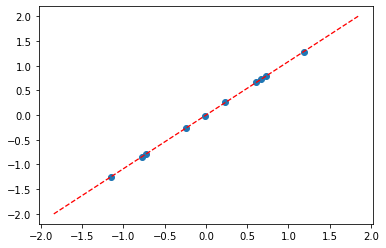

In [145]:
# Data terbaru berdasarkan kedekatan dengan First Principal Component

c = np.linspace(-2,2,1000)
plt.plot(0.6778734*c/0.73517866,c, ls = '--',color = 'red', linewidth =1.3) #Principal component 1
plt.scatter(df['x_br'],df['y_br'])
plt.plot()
plt.show()

plot scattering di atas adalah sebaran data dari hasil perhitungan FCP, terlihat data berhimpit dengan FCP.

In [136]:
def data_baru2(x):
    x = eigen_vec[:,1][0]*x + z
    return x
def data_baru3(y):
    y =  eigen_vec[:,1][1]*y + w
    return y

In [137]:
df['x_br_baru'] = df['FCP'].apply(data_baru2)
df['y_br_baru'] = df['FCP'].apply(data_baru3)

In [138]:
df

,x,y,x_adj,y_adj,FCP,x_br,y_br,x_br_baru,y_br_baru
0,2.5,2.4,0.69,0.59,-0.901488,0.611095,0.662755,2.421095,2.572755
1,0.5,0.7,-1.31,-1.11,1.704062,-1.155139,-1.252790,0.654861,0.657210
2,2.2,2.9,0.39,1.09,-1.065715,0.722420,0.783491,2.532420,2.693491
3,1.9,2.2,0.09,0.39,-0.347728,0.235716,0.255642,2.045716,2.165642
4,3.1,3.0,1.29,1.19,-1.749319,1.185817,1.286062,2.995817,3.196062
5,2.3,2.7,0.49,0.89,-0.986467,0.668700,0.725229,2.478700,2.635229
6,2.0,1.6,0.19,-0.21,0.025592,-0.017348,-0.018814,1.792652,1.891186
7,1.0,1.1,-0.81,-0.71,1.071054,-0.726039,-0.787416,1.083961,1.122584
8,1.5,1.6,-0.31,-0.21,0.364528,-0.247104,-0.267993,1.562896,1.642007
9,1.1,0.9,-0.71,-0.91,1.150303,-0.779760,-0.845678,1.030240,1.064322


## Cara ML

In [139]:
#import libraries PCA from sklearn

from sklearn.decomposition import PCA

In [140]:
x= df.iloc[:, [2,3]]

In [141]:
pca = PCA(n_components=1)
pca.fit(x)

PCA(n_components=1)

In [146]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.6778734  -0.73517866]]
[1.28402771]


In [173]:
x_PCA = pca.transform(x)

In [186]:
x_PCA.shape

(10, 1)

In [189]:
pca_hasil = pd.DataFrame(x_PCA,columns=['PCA'])
pca_hasil

,PCA
0,-0.827970
1,1.777580
2,-0.992197
3,-0.274210
4,-1.675801
5,-0.912949
6,0.099109
7,1.144572
8,0.438046
9,1.223821


In [190]:
def data_baru4(x):
    x = eigen_vec[:,1][0]*x
    return x
def data_baru5(y):
    y =  eigen_vec[:,1][1]*y 
    return y

In [193]:
x['x_br'] = pca_hasil.apply(data_baru4)
x['y_br'] = pca_hasil.apply(data_baru5)

C:\Users\win10\AppData\Local\Temp\ipykernel_11956\1532488631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['x_br'] = pca_hasil.apply(data_baru4)
C:\Users\win10\AppData\Local\Temp\ipykernel_11956\1532488631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['y_br'] = pca_hasil.apply(data_baru5)


In [194]:
x

,x_adj,y_adj,x_PCA,x_br,y_br
0,0.69,0.59,-0.827970,0.561259,0.608706
1,-1.31,-1.11,1.777580,-1.204974,-1.306839
2,0.39,1.09,-0.992197,0.672584,0.729442
3,0.09,0.39,-0.274210,0.185880,0.201594
4,1.29,1.19,-1.675801,1.135981,1.232013
5,0.49,0.89,-0.912949,0.618864,0.671181
6,0.19,-0.21,0.099109,-0.067184,-0.072863
7,-0.81,-0.71,1.144572,-0.775875,-0.841465
8,-0.31,-0.21,0.438046,-0.296940,-0.322042
9,-0.71,-0.91,1.223821,-0.829595,-0.899727


In [154]:
eigen_vec[:,1]

array([-0.6778734 , -0.73517866])

Hasil di atas sama dengan hasil yang kita peroleh dari perhitungan aljabar linear

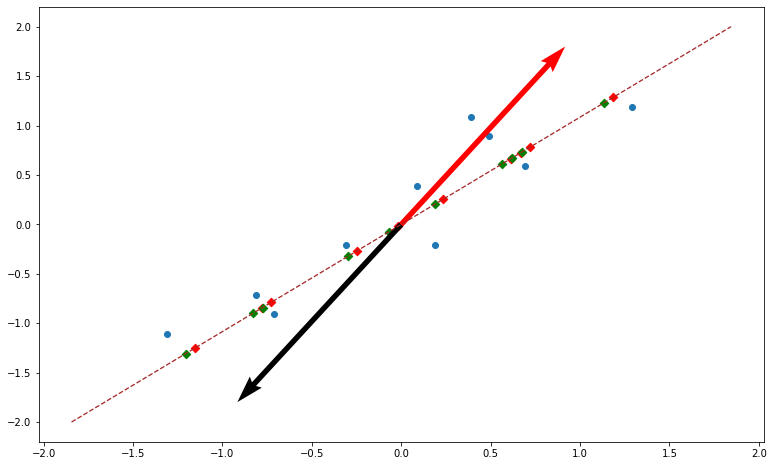

In [199]:
plt.figure(figsize=(13,8))
c = np.linspace(-2,2,1000)
plt.plot(0.6778734*c/0.73517866, c, ls = '--',color = 'brown', linewidth =1.3) #Principal component 1
plt.scatter(x.iloc[:,0],x.iloc[:,1])
plt.scatter(df['x_br'],df['y_br'],marker='D',color='red')
plt.scatter(x['x_br'],x['y_br'],  marker='D',color='green')
plt.quiver(0,0,pca.components_[:,0],pca.components_[:,1],scale = 3)
plt.quiver(0,0,-eigen_vec[:,1][0],-eigen_vec[:,1][1],scale = 3, color = 'red')
plt.show()

Ini menarik. Hasil perhitungan numerik dan ML sama-sama memberikan sebaran data First principal Component $\\$
yang berhimpitan dengan garis, tapi terdapat sedikit pergeseran antara 
diamond hijau dan merah.$\\$ Sementara itu, hasil vektor eigen vektor seharusnya diharapkan tumpang tindih dengan garis.
